<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
example_document = '''
Friday 9/11/2018
9th November 2018

Hey ho !
Can i have your contact details, please? 
aaha aaahhhh ah ahah ahahah ahh ahhahahaha hahaha hahahah
Sure. 
My email is mohammed@cognitionx.io and my phone number is 0743423453 0 01 012 1987 98 0.32 2.34 

The Matrix is a 1999 science fiction action film written and directed by The Wachowskis, starring Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, and Joe Pantoliano.
'''

# GATE API (Free)

In [0]:
import requests
url = "https://cloud-api.gate.ac.uk/process-document/annie-named-entity-recognizer"
headers = {'Content-Type': 'text/plain'}
response = requests.post(url, data=example_document, headers=headers).json()

import json
print(json.dumps(response, indent=2))

In [0]:
def gate_ner(sentence):
  import requests
  return [(sentence[entity["indices"][0]:entity["indices"][1]] + f" ({entity['gender']})",entity_type) if entity_type == "Person" and "gender" in entity else (sentence[entity["indices"][0]:entity["indices"][1]],entity_type)  for entity_type,entities in requests.post("https://cloud-api.gate.ac.uk/process-document/annie-named-entity-recognizer", data=sentence, headers={'Content-Type': 'text/plain'}).json()["entities"].items() for entity in entities]

In [38]:
gate_ner(example_document)

2019-03-14 10:02:56.833 DEBUG in 'urllib3.connectionpool'['connectionpool'] at line 824: Starting new HTTPS connection (1): cloud-api.gate.ac.uk
2019-03-14 10:02:57.941 DEBUG in 'urllib3.connectionpool'['connectionpool'] at line 396: https://cloud-api.gate.ac.uk:443 "POST /process-document/annie-named-entity-recognizer HTTP/1.1" 200 None


[('mohammed@cognitionx.io', 'Address'),
 ('Friday', 'Date'),
 ('9/11/2018', 'Date'),
 ('9th November 2018', 'Date'),
 ('1987', 'Date'),
 ('1999', 'Date'),
 ('Keanu Reeves (male)', 'Person'),
 ('Laurence Fishburne (male)', 'Person'),
 ('Carrie-Anne Moss (female)', 'Person'),
 ('Hugo Weaving (male)', 'Person'),
 ('Joe Pantoliano (male)', 'Person')]

# NLTK

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [0]:
def nltk_ner(document):
  return {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(document))) if hasattr(chunk, 'label') }

In [34]:
nltk_ner(example_document)

{('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORGANIZATION'),
 ('Wachowskis', 'ORGANIZATION')}

# Spacy

In [0]:
import spacy
sp = spacy.load('en')

In [0]:
def spacy_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in sp(document).ents}

In [33]:
spacy_ner(example_document)

{('', 'GPE'),
 ('0.32 2.34', 'MONEY'),
 ('012', 'ORG'),
 ('0743423453', 'DATE'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('98', 'CARDINAL'),
 ('9th', 'ORDINAL'),
 ('Carrie-Anne Moss', 'PERSON'),
 ('Friday 9/11/2018', 'DATE'),
 ('Hugo Weaving', 'GPE'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORG'),
 ('Wachowskis', 'ORG')}

In [0]:
!python3 -m spacy download en_core_web_lg
sp_lg = spacy.load('en_core_web_lg') 

In [0]:
def spacy_large_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in sp_lg(document).ents}

In [32]:
spacy_large_ner(example_document)

{('', 'PERSON'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('2.34', 'TIME'),
 ('98 0.32', 'QUANTITY'),
 ('Carrie-Anne Moss', 'PERSON'),
 ('Friday 9/11/2018', 'DATE'),
 ('Hugo Weaving', 'ORG'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORG'),
 ('November 2018', 'DATE'),
 ('Wachowskis', 'PERSON'),
 ('mohammed@cognitionx.io', 'PERSON')}

# Flair

In [0]:
!pip3 install flair

In [0]:
from flair.models import SequenceTagger
flair_12class = SequenceTagger.load('ner-ontonotes-fast')
flair_4class = SequenceTagger.load('ner')

In [0]:
from flair.data import Sentence

s = Sentence(example_document)
flair_12class.predict(s)
s.to_dict(tag_type='ner')

In [0]:
def flair_4ner(document):
  s = Sentence(document)
  flair_4class.predict(s)
  entities = s.to_dict(tag_type='ner')
  return [(entity["text"], entity["type"]) for entity in entities["entities"]]

def flair_12ner(document):
  s = Sentence(document)
  flair_12class.predict(s)
  entities = s.to_dict(tag_type='ner')
  return [(entity["text"], entity["type"]) for entity in entities["entities"]]

In [30]:
flair_4ner(example_document)

[('The Wachowskis,', 'PER'),
 ('Keanu Reeves,', 'PER'),
 ('Laurence Fishburne,', 'PER'),
 ('Carrie-Anne Moss,', 'PER'),
 ('Hugo Weaving,', 'PER'),
 ('Joe Pantoliano.\n', 'PER')]

In [31]:
flair_12ner(example_document)

[('\nFriday 9/11/2018\n9th November 2018\n\nHey', 'DATE'),
 ('98 0.32 2.34', 'CARDINAL'),
 ('Matrix', 'PRODUCT'),
 ('1999', 'DATE'),
 ('Wachowskis,', 'PERSON'),
 ('Keanu Reeves,', 'PERSON'),
 ('Laurence Fishburne,', 'PERSON'),
 ('Carrie-Anne Moss,', 'PERSON'),
 ('Hugo Weaving,', 'PERSON'),
 ('Joe', 'PERSON')]

# Deep Pavlov

In [0]:
!pip3 install deeppavlov
!python3 -m deeppavlov install ner_ontonotes
from deeppavlov import configs, build_model
deeppavlov_ner = build_model(configs.ner.ner_ontonotes, download=True)

In [0]:
def convert_entities(entities):
  ents = set()
  for entity,next_entity in zip(entities,entities[1:] + [(".","O")]):
    word,tag = entity
    if tag != "O":
      ent_position, ent_type = tag.split("-")
      if ent_position == "U":
        ents.add((word,ent_type))
      else:
        if ent_position == "B":
          w = word
        elif ent_position == "I":
          w += " " + word
          if next_entity[1].split("-")[0] != "I":
            ents.add((w,ent_type))
  return ents

def dp_ner(sentence):
  tokens,tags = deeppavlov_ner([sentence])
  return convert_entities([(tok,tg) for token,tag in zip(tokens,tags) for tok,tg in list(zip(token,tag)) ])

In [29]:
dp_ner(example_document)  

{('01 012', 'CARDINAL'),
 ('98 0.32 2.34', 'CARDINAL'),
 ('Carrie-Anne Moss', 'PERSON'),
 ('Friday 9/11/2018 9th November 2018', 'DATE'),
 ('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('The Matrix', 'WORK_OF_ART')}

# Stanford Core NLP

In [0]:
!pip3 install nltk==3.2.4

In [0]:
!wget http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
!unzip stanford-ner-2015-04-20.zip 

In [0]:
from nltk.tag.stanford import StanfordNERTagger
jar = "stanford-ner-2015-04-20/stanford-ner-3.5.2.jar"
model = "stanford-ner-2015-04-20/classifiers/" 
st_3class = StanfordNERTagger(model + "english.all.3class.distsim.crf.ser.gz", jar, encoding='utf8') 
st_4class = StanfordNERTagger(model + "english.conll.4class.distsim.crf.ser.gz", jar, encoding='utf8') 
st_7class = StanfordNERTagger(model + "english.muc.7class.distsim.crf.ser.gz", jar, encoding='utf8') 

In [0]:
def stanford_ner(document,model):
  if model == 1:
    return [(entity,tag) for entity,tag in st_3class.tag(document.split()) if tag != "O"]
  elif model == 2:
    return [(entity,tag) for entity,tag in st_4class.tag(document.split()) if tag != "O"]
  elif model == 3:
    return [(entity,tag) for entity,tag in st_7class.tag(document.split()) if tag != "O"]

In [26]:
stanford_ner(example_document,model=1)

[('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

In [27]:
stanford_ner(example_document,model=2)

[('Matrix', 'PERSON'),
 ('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Moss,', 'PERSON'),
 ('Hugo', 'PERSON'),
 ('Weaving,', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

In [28]:
stanford_ner(example_document,model=3)

[('Friday', 'DATE'),
 ('9112018', 'DATE'),
 ('9th', 'DATE'),
 ('November', 'DATE'),
 ('2018', 'DATE'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Keanu', 'PERSON'),
 ('Reeves,', 'PERSON'),
 ('Laurence', 'PERSON'),
 ('Fishburne,', 'PERSON'),
 ('Carrie-Anne', 'PERSON'),
 ('Moss,', 'PERSON'),
 ('Joe', 'PERSON'),
 ('Pantoliano.', 'PERSON')]

# Allen NLP

In [0]:
!pip3 install allennlp
from allennlp.predictors import Predictor
al = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/fine-grained-ner-model-elmo-2018.12.21.tar.gz")

In [0]:
def convert_results(allen_results):
  ents = set()
  for word, tag in zip(allen_results["words"], allen_results["tags"]):
    if tag != "O":
      ent_position, ent_type = tag.split("-")
      if ent_position == "U":
        ents.add((word,ent_type))
      else:
        if ent_position == "B":
          w = word
        elif ent_position == "I":
          w += " " + word
        elif ent_position == "L":
          w += " " + word
          ents.add((w,ent_type))
  return ents

def allennlp_ner(document):
  return convert_results(al.predict(sentence=document))

In [41]:
allennlp_ner(example_document)

{('0.32 2.34', 'CARDINAL'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Carrie - Anne Moss', 'PERSON'),
 ('Friday 9/11/2018 9th November 2018', 'DATE'),
 ('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('The Matrix', 'WORK_OF_ART'),
 ('The Wachowskis', 'PERSON')}

# Polyglot

In [0]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.en ner2.en
from polyglot.text import Text

In [0]:
def polyglot_ner(document):
  return {(' '.join(entity),entity.tag.split('-')[-1]) for entity in Text(document).entities}

In [42]:
polyglot_ner(example_document)

2019-03-14 10:05:58.388 INFO in 'polyglot.mapping.expansion'['expansion'] at line 79: We have 100004 original words.
2019-03-14 10:05:58.389 INFO in 'polyglot.mapping.expansion'['expansion'] at line 80: Added 144984 new words.
2019-03-14 10:05:58.395 INFO in 'polyglot.mapping.expansion'['expansion'] at line 81: The new total number of words is 244988
2019-03-14 10:05:58.409 DEBUG in 'polyglot.mapping.expansion'['expansion'] at line 82: Words added
<unk> <s> </s> <pad> utc defaultsort january october february u.s. ####en#### england california france william james canada australia george david germany australian washington #en# robert japan ####en## paul canadian thomas charles michael j. isbn texas ireland henry african africa richard chicago a. paris angeles dr. mary virginia irish zealand florida ##en## mexico italy m. pennsylvania martin poland bbc usa no. wales joseph s. louis britain boston spain ohio oxford edward russia w. r. e. carolina scotland h. mr. israel francisco asia mic

{('Anne Moss', 'PER'),
 ('Carrie', 'PER'),
 ('Hugo Weaving', 'PER'),
 ('Joe Pantoliano', 'PER'),
 ('Keanu Reeves', 'PER'),
 ('Laurence Fishburne', 'PER'),
 ('cognitionx.io', 'PER'),
 ('mohammed', 'PER')}

# Hierarchical Multi-Task Learning model (HMTL)

In [0]:
#!git clone https://github.com/huggingface/hmtl
#!hmtl/scripts/data_setup.sh
#!pip3 install emoji
#!pip3 install allennlp
#from hmtlPredictor import HMTLPredictor
#html = HMTLPredictor(model_name ="conll_full_elmo")
#hmtl.predict(example_document, raw_format = True)

# Which is the Best?

In [0]:
test = {
  "text":'''Elizabeth was born in London as the first child of the Duke and Duchess of York, later King George VI and Queen Elizabeth, and she was educated privately at home. Her father acceded to the throne on the abdication of his brother King Edward VIII in 1936''',
  "entities" : {
    "dates":{"1936"},
    "locations":{"London", "York"},
    "people":{
        "Elizabeth",
        "Duke",
        "Duchess",
        "King George VI",
        "Queen Elizabeth",
        "King Edward VIII",
    },
  }
}

## Which is the quickest?

In [58]:
import time

dp_start = time.time()
Y_deeppavlov = dp_ner(test["text"])
dp_end = time.time()
deeppavlov_time = dp_end - dp_start
print(f"Deep Pavlov = {deeppavlov_time}s")

flair_start = time.time()
Y_flair4 = flair_4ner(test["text"])
flair_end = time.time()
flair_time4 = flair_end - flair_start
print(f"Flair (4 class) = {flair_time4}s")

flair_start = time.time()
Y_flair12 = flair_12ner(test["text"])
flair_end = time.time()
flair_time12 = flair_end - flair_start
print(f"Flair (12 class) = {flair_time12}s")

gate_start = time.time()
Y_gate = gate_ner(test["text"])
gate_end = time.time()
gate_time = gate_end - gate_start
print(f"GATE = {gate_time}s")

nltk_start = time.time()
Y_nltk = nltk_ner(test["text"])
nltk_end = time.time()
nltk_time = nltk_end - nltk_start
print(f"NLTK = {nltk_time}s")

stanford_start = time.time()
Y_stanford1 = stanford_ner(test["text"],model=1)
stanford_end = time.time()
stanford_time1 = stanford_end - stanford_start
print(f"Stanford Core NLP (3 class) = {stanford_time1}s")

stanford_start = time.time()
Y_stanford2 = stanford_ner(test["text"],model=2)
stanford_end = time.time()
stanford_time2 = stanford_end - stanford_start
print(f"Stanford Core NLP (4 class) = {stanford_time2}s")

stanford_start = time.time()
Y_stanford3 = stanford_ner(test["text"],model=3)
stanford_end = time.time()
stanford_time3 = stanford_end - stanford_start
print(f"Stanford Core NLP (7 class) = {stanford_time3}s")

spacy_start = time.time()
Y_spacy = spacy_ner(test["text"])
spacy_end = time.time()
spacy_time = spacy_end - spacy_start
print(f"Spacy = {spacy_time}s")

spacy_start = time.time()
Y_spacy_lg = spacy_large_ner(test["text"])
spacy_end = time.time()
spacy_lg_time = spacy_end - spacy_start
print(f"Spacy (large) = {spacy_lg_time}s")

allen_start = time.time()
Y_allen = allennlp_ner(test["text"])
allen_end = time.time()
allen_time = allen_end - allen_start
print(f"Allen NLP = {allen_time}s")

poly_start = time.time()
Y_polyglot = polyglot_ner(test["text"])
poly_end = time.time()
poly_time = poly_end - poly_start
print(f"Polyglot = {poly_time}s")

Deep Pavlov = 0.019457101821899414s


2019-03-14 10:12:42.514 DEBUG in 'urllib3.connectionpool'['connectionpool'] at line 824: Starting new HTTPS connection (1): cloud-api.gate.ac.uk


Flair (4 class) = 0.3364682197570801s
Flair (12 class) = 0.12086081504821777s


2019-03-14 10:12:43.645 DEBUG in 'urllib3.connectionpool'['connectionpool'] at line 396: https://cloud-api.gate.ac.uk:443 "POST /process-document/annie-named-entity-recognizer HTTP/1.1" 200 None


GATE = 1.138251781463623s
NLTK = 0.022890329360961914s
Stanford Core NLP (3 class) = 3.334883689880371s
Stanford Core NLP (4 class) = 3.5499062538146973s
Stanford Core NLP (7 class) = 3.3030967712402344s
Spacy = 0.03377223014831543s
Spacy (large) = 0.031033992767333984s
Allen NLP = 2.225233554840088s
Polyglot = 0.008097410202026367s


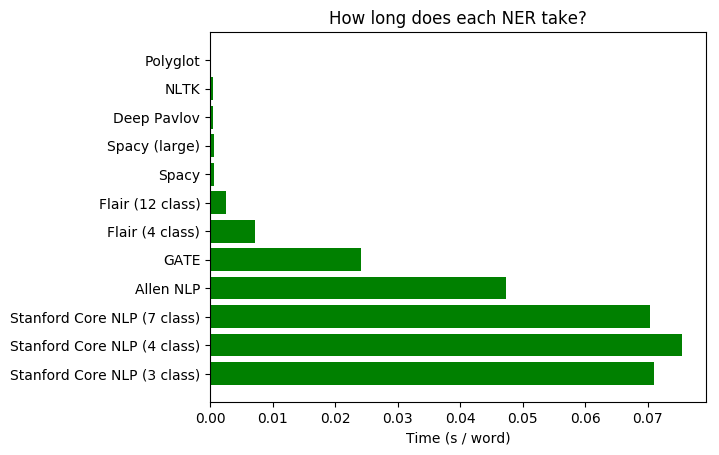

In [59]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

n_words = len(test["text"].split())
ners = ('Polyglot', 'NLTK',  'Deep Pavlov','Spacy (large)', 'Spacy', 'Flair (12 class)', 'Flair (4 class)', 'GATE',  'Allen NLP', 'Stanford Core NLP (7 class)', 'Stanford Core NLP (4 class)', 'Stanford Core NLP (3 class)')
performance = [ poly_time/n_words, nltk_time/n_words, deeppavlov_time/n_words, spacy_lg_time/n_words, spacy_time/n_words, flair_time12/n_words, flair_time4/n_words, gate_time/n_words,  allen_time/n_words, stanford_time3/n_words, stanford_time2/n_words, stanford_time1/n_words]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('Time (s / word)')
ax.set_title('How long does each NER take?')

plt.show()

## Which is the best NER for finding entities?

In [0]:
def f1_score(Y, Y_hat, strict=False):
  e = .000001
  non_entities = {}
  true_positives = sum([max([1 if y == y_hat else .5 if y_hat in y else .5 if y in y_hat else 0 for y_hat in Y_hat]+ [0]) for y in Y]) # correctly identified
  if strict: true_positives = len(Y.intersection(Y_hat)) #if strict, only count exact entity matches and not partial matches (default)
  dY = Y ^ Y_hat 
  false_positives = len(Y_hat.intersection(dY)) # incorrectly identified
  false_negatives = len(Y) - true_positives # incorrectly rejected
  recall = true_positives / (true_positives + false_negatives + e)
  precision = true_positives / (true_positives + false_positives + e)
  return (2 * precision * recall) / (precision + recall + e)

In [61]:
expected_entities = {entity for entities in test["entities"].values() for entity in entities}
gate_entities = {entity.replace('(male)','').replace('(female)','').strip() for entity,_ in Y_gate}
polyglot_entities = {entity for entity,_ in Y_polyglot}
spacy_entities = {entity for entity,_ in Y_spacy}
spacy_lg_entities = {entity for entity,_ in Y_spacy_lg}
nltk_entities = {entity for entity,_ in Y_nltk}
allen_entities = {entity for entity,_ in Y_allen}
stanford_entities1 = {entity for entity,_ in Y_stanford1}
stanford_entities2 = {entity for entity,_ in Y_stanford2}
stanford_entities3 = {entity for entity,_ in Y_stanford3}
flair_entities4 = {entity for entity,_ in Y_flair4}
flair_entities12 = {entity for entity,_ in Y_flair12}
deeppavlov_entities = {entity for entity,_ in Y_deeppavlov}

print(f"Expected = 100.0%\n\t{sorted(expected_entities)}\n")
f1_deeppavlov = f1_score(expected_entities, deeppavlov_entities)
print(f"Deep Pavlov = {f1_deeppavlov*100}%\n\t{sorted(deeppavlov_entities)}\n")
f1_flair4 = f1_score(expected_entities, flair_entities4)
print(f"Flair (4 class) = {f1_flair4*100}%\n\t{sorted(flair_entities4)}\n")
f1_flair12 = f1_score(expected_entities, flair_entities12)
print(f"Flair (12 class) = {f1_flair12*100}%\n\t{sorted(flair_entities12)}\n")
f1_gate = f1_score(expected_entities, gate_entities)
print(f"GATE = {f1_gate*100}%\n\t{sorted(gate_entities)}\n")
f1_poly = f1_score(expected_entities, polyglot_entities)
print(f"Polyglot = {f1_poly*100}%\n\t{sorted(polyglot_entities)}\n")
f1_spacy = f1_score(expected_entities, spacy_entities)
print(f"Spacy = {f1_spacy*100}%\n\t{sorted(spacy_entities)}\n")
f1_spacy_lg = f1_score(expected_entities, spacy_lg_entities)
print(f"Spacy (large) = {f1_spacy_lg*100}%\n\t{sorted(spacy_lg_entities)}\n")
f1_nltk = f1_score(expected_entities, nltk_entities)
print(f"NLTK = {f1_nltk*100}%\n\t{sorted(nltk_entities)}\n")
f1_stanford1 = f1_score(expected_entities, stanford_entities1)
print(f"Stanford Core NLP (3 class) = {f1_stanford1*100}%\n\t{sorted(stanford_entities1)}\n")
f1_stanford2 = f1_score(expected_entities, stanford_entities2)
print(f"Stanford Core NLP (4 class) = {f1_stanford2*100}%\n\t{sorted(stanford_entities2)}\n")
f1_stanford3 = f1_score(expected_entities, stanford_entities3)
print(f"Stanford Core NLP (7 class) = {f1_stanford3*100}%\n\t{sorted(stanford_entities3)}\n")
f1_allen = f1_score(expected_entities, allen_entities)
print(f"Allen NLP = {f1_allen*100}%\n\t{sorted(allen_entities)}\n")

Expected = 100.0%
	['1936', 'Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Deep Pavlov = 53.33327822226585%
	['Duchess of York', 'George VI', 'King Edward VIII', 'Queen Elizabeth']

Flair (4 class) = 51.42851559188594%
	['Duchess of York,', 'Edward VIII', 'Elizabeth', 'Elizabeth,', 'George VI', 'London']

Flair (12 class) = 59.45940306797547%
	['1936', 'Duke', 'Edward VIII', 'Elizabeth', 'Elizabeth,', 'George VI', 'London', 'first']

GATE = 84.21046759005813%
	['1936', 'Duchess', 'Duke', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth', 'York']

Polyglot = 94.1175861591972%
	['Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Spacy = 66.6666089991195%
	['1936', 'Elizabeth', 'George VI', 'King Edward VIII', 'London', 'Queen Elizabeth', 'first']

Spacy (large) = 66.6666089991195%
	['1936', 'Elizabeth', 'George VI', 'King Edward VIII', 'London', 'Queen 

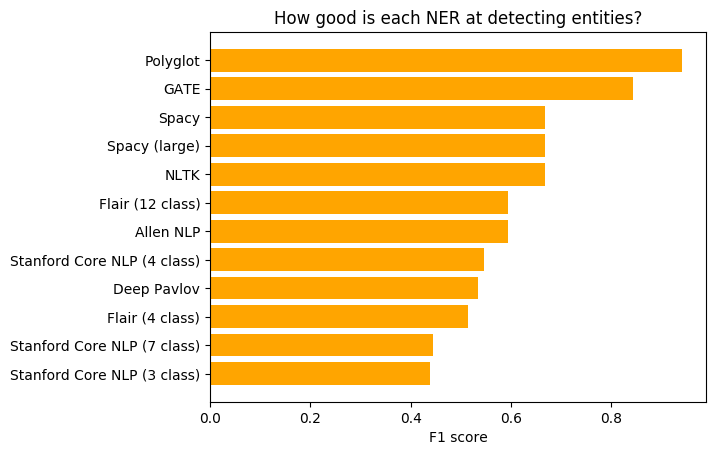

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

ners = ('Polyglot', 'GATE', 'Spacy', 'Spacy (large)', 'NLTK', 'Flair (12 class)', 'Allen NLP', 'Stanford Core NLP (4 class)', 'Deep Pavlov', 'Flair (4 class)', 'Stanford Core NLP (7 class)', 'Stanford Core NLP (3 class)')
performance = [f1_poly, f1_gate, f1_spacy, f1_spacy_lg, f1_nltk, f1_flair12, f1_allen, f1_stanford2, f1_deeppavlov, f1_flair4, f1_stanford3, f1_stanford1]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('F1 score')
ax.set_title('How good is each NER at detecting entities?')

plt.show()

## Which is the best NER for correctly labelling entities?

In [63]:
deeppavlov_people = {entity for entity,tag in Y_deeppavlov if tag == "PERSON"}
flair4_people = {entity for entity,tag in Y_flair4 if tag == "PER"}
flair12_people = {entity for entity,tag in Y_flair12 if tag == "PERSON"}
gate_people = {entity.replace('(male)','').replace('(female)','').strip() for entity,tag in Y_gate if tag == "Person"}
polyglot_people = {entity for entity,tag in Y_polyglot if tag == "PER"}
spacy_people = {entity for entity,tag in Y_spacy if tag == "PERSON"}
spacy_lg_people = {entity for entity,tag in Y_spacy_lg if tag == "PERSON"}
nltk_people = {entity for entity,tag in Y_nltk if tag == "PERSON"}
stanford_people1 = {entity for entity,tag in Y_stanford1 if tag == "PERSON"}
stanford_people2 = {entity for entity,tag in Y_stanford2 if tag == "PERSON"}
stanford_people3 = {entity for entity,tag in Y_stanford3 if tag == "PERSON"}
allen_people = {entity for entity,tag in Y_allen if tag == "PERSON"}

deeppavlov_dates = {entity for entity,tag in Y_deeppavlov if tag == "DATE"}
flair4_dates = {entity for entity,tag in Y_flair4 if tag == "DATE"}
flair12_dates = {entity for entity,tag in Y_flair12 if tag == "DATE"}
gate_dates = {entity for entity,tag in Y_gate if tag == "Date"}
polyglot_dates = {entity for entity,tag in Y_polyglot if tag == "DATE"}
spacy_dates = {entity for entity,tag in Y_spacy if tag == "DATE"}
spacy_lg_dates = {entity for entity,tag in Y_spacy_lg if tag == "DATE"}
nltk_dates = {entity for entity,tag in Y_nltk if tag == "DATE"}
stanford_dates1 = {entity for entity,tag in Y_stanford1 if tag == "DATE"}
stanford_dates2 = {entity for entity,tag in Y_stanford2 if tag == "DATE"}
stanford_dates3 = {entity for entity,tag in Y_stanford3 if tag == "DATE"}
allen_dates = {entity for entity,tag in Y_allen if tag == "DATE"}

deeppavlov_locations = {entity for entity,tag in Y_deeppavlov if tag == "GPE"}
flair4_locations = {entity for entity,tag in Y_flair4 if tag == "LOC"}
flair12_locations = {entity for entity,tag in Y_flair12 if tag == "GPE"}
gate_locations = {entity for entity,tag in Y_gate if tag == "Location"}
polyglot_locations = {entity for entity,tag in Y_polyglot if tag == "LOC"}
spacy_locations = {entity for entity,tag in Y_spacy if tag == "GPE"}
spacy_lg_locations = {entity for entity,tag in Y_spacy_lg if tag == "GPE"}
nltk_locations = {entity for entity,tag in Y_nltk if tag == "GPE"}
stanford_locations1 = {entity for entity,tag in Y_stanford1 if tag == "LOCATION"}
stanford_locations2 = {entity for entity,tag in Y_stanford2 if tag == "LOCATION"}
stanford_locations3 = {entity for entity,tag in Y_stanford3 if tag == "LOCATION"}
allen_locations = {entity for entity,tag in Y_allen if tag == "GPE"}

f1_deeppavlov_ppl = f1_score(test["entities"]["people"], deeppavlov_people)
f1_deeppavlov_dts = f1_score(test["entities"]["dates"], deeppavlov_dates)
f1_deeppavlov_loc = f1_score(test["entities"]["locations"], deeppavlov_locations)
print(f"Deep Pavlov\n\tPeople =\t{f1_deeppavlov_ppl*100}%\t{deeppavlov_people}\n\tLocations =\t{f1_deeppavlov_loc*100}%\t{deeppavlov_locations}\n\tDates =\t\t{f1_deeppavlov_dts*100}%\t{deeppavlov_dates}\n\n")
f1_flair4_ppl = f1_score(test["entities"]["people"], flair4_people)
f1_flair4_dts = f1_score(test["entities"]["dates"], flair4_dates)
f1_flair4_loc = f1_score(test["entities"]["locations"], flair4_locations)
print(f"Flair (4 class) \n\tPeople =\t{f1_flair4_ppl*100}%\t{flair4_people}\n\tLocations =\t{f1_flair4_loc*100}%\t{flair4_locations}\n\tDates =\t\t{f1_flair4_dts*100}%\t{flair4_dates}\n\n")
f1_flair12_ppl = f1_score(test["entities"]["people"], flair12_people)
f1_flair12_dts = f1_score(test["entities"]["dates"], flair12_dates)
f1_flair12_loc = f1_score(test["entities"]["locations"], flair12_locations)
print(f"Flair (12 class) \n\tPeople =\t{f1_flair12_ppl*100}%\t{flair12_people}\n\tLocations =\t{f1_flair12_loc*100}%\t{flair12_locations}\n\tDates =\t\t{f1_flair12_dts*100}%\t{flair12_dates}\n\n")
f1_gate_ppl = f1_score(test["entities"]["people"], gate_people)
f1_gate_dts = f1_score(test["entities"]["dates"], gate_dates)
f1_gate_loc = f1_score(test["entities"]["locations"], gate_locations)
print(f"GATE \n\tPeople =\t{f1_gate_ppl*100}%\t{gate_people}\n\tLocations =\t{f1_gate_loc*100}%\t{gate_locations}\n\tDates =\t\t{f1_gate_dts*100}%\t{gate_dates}\n\n")
f1_poly_ppl = f1_score(test["entities"]["people"], polyglot_people)
f1_poly_dts = f1_score(test["entities"]["dates"], polyglot_dates)
f1_poly_loc = f1_score(test["entities"]["locations"], polyglot_locations)
print(f"Polyglot \n\tPeople =\t{f1_poly_ppl*100}%\t{polyglot_people}\n\tLocations =\t{f1_poly_loc*100}%\t{polyglot_locations}\n\tDates =\t\t{f1_poly_dts*100}%\t{polyglot_dates}\n\n")
f1_spacy_ppl = f1_score(test["entities"]["people"], spacy_people)
f1_spacy_dts = f1_score(test["entities"]["dates"], spacy_dates)
f1_spacy_loc = f1_score(test["entities"]["locations"], spacy_locations)
print(f"Spacy \n\tPeople =\t{f1_spacy_ppl*100}%\t{spacy_people}\n\tLocations =\t{f1_spacy_loc*100}%\t{spacy_locations}\n\tDates =\t\t{f1_spacy_dts*100}%\t{spacy_dates}\n\n")
f1_spacy_lg_ppl = f1_score(test["entities"]["people"], spacy_lg_people)
f1_spacy_lg_dts = f1_score(test["entities"]["dates"], spacy_lg_dates)
f1_spacy_lg_loc = f1_score(test["entities"]["locations"], spacy_lg_locations)
print(f"Spacy (large) \n\tPeople =\t{f1_spacy_lg_ppl*100}%\t{spacy_lg_people}\n\tLocations =\t{f1_spacy_lg_loc*100}%\t{spacy_lg_locations}\n\tDates =\t\t{f1_spacy_lg_dts*100}%\t{spacy_lg_dates}\n\n")
f1_nltk_ppl = f1_score(test["entities"]["people"], nltk_people)
f1_nltk_dts = f1_score(test["entities"]["dates"], nltk_dates)
f1_nltk_loc = f1_score(test["entities"]["locations"], nltk_locations)
print(f"NLTK \n\tPeople =\t{f1_nltk_ppl*100}%\t{nltk_people}\n\tLocations =\t{f1_nltk_loc*100}%\t{nltk_locations}\n\tDates =\t\t{f1_nltk_dts*100}%\t{nltk_dates}\n\n")
f1_stanford_ppl1 = f1_score(test["entities"]["people"], stanford_people1)
f1_stanford_dts1 = f1_score(test["entities"]["dates"], stanford_dates1)
f1_stanford_loc1 = f1_score(test["entities"]["locations"], stanford_locations1)
print(f"Stanford Core NLP (3 class)\n\tPeople =\t{f1_stanford_ppl1*100}%\t{stanford_people1}\n\tLocations =\t{f1_stanford_loc1*100}%\t{stanford_locations1}\n\tDates =\t\t{f1_stanford_dts1*100}%\t{stanford_dates1}\n\n")
f1_stanford_ppl2 = f1_score(test["entities"]["people"], stanford_people2)
f1_stanford_dts2 = f1_score(test["entities"]["dates"], stanford_dates2)
f1_stanford_loc2 = f1_score(test["entities"]["locations"], stanford_locations2)
print(f"Stanford Core NLP (4 class)\n\tPeople =\t{f1_stanford_ppl2*100}%\t{stanford_people2}\n\tLocations =\t{f1_stanford_loc2*100}%\t{stanford_locations2}\n\tDates =\t\t{f1_stanford_dts2*100}%\t{stanford_dates2}\n\n")
f1_stanford_ppl3 = f1_score(test["entities"]["people"], stanford_people3)
f1_stanford_dts3 = f1_score(test["entities"]["dates"], stanford_dates3)
f1_stanford_loc3 = f1_score(test["entities"]["locations"], stanford_locations3)
print(f"Stanford Core NLP (7 class)\n\tPeople =\t{f1_stanford_ppl3*100}%\t{stanford_people3}\n\tLocations =\t{f1_stanford_loc3*100}%\t{stanford_locations3}\n\tDates =\t\t{f1_stanford_dts3*100}%\t{stanford_dates3}\n\n")
f1_allen_ppl = f1_score(test["entities"]["people"], allen_people)
f1_allen_dts = f1_score(test["entities"]["dates"], allen_dates)
f1_allen_loc = f1_score(test["entities"]["locations"], allen_locations)
print(f"Allen NLP \n\tPeople =\t{f1_allen_ppl*100}%\t{allen_people}\n\tLocations =\t{f1_allen_loc*100}%\t{allen_locations}\n\tDates =\t\t{f1_allen_dts*100}%\t{allen_dates}\n\n")

Deep Pavlov
	People =	60.86950472594065%	{'Duchess of York', 'George VI', 'Queen Elizabeth', 'King Edward VIII'}
	Locations =	0.0%	set()
	Dates =		0.0%	set()


Flair (4 class) 
	People =	46.15378934916695%	{'Elizabeth,', 'Elizabeth', 'George VI', 'Duchess of York,', 'Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Flair (12 class) 
	People =	43.47820340270506%	{'Elizabeth', 'George VI', 'Elizabeth,', 'Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		99.99985000012501%	{'1936'}


GATE 
	People =	54.54539504136905%	{'Elizabeth', 'George VI', 'Queen Elizabeth', 'Edward VIII'}
	Locations =	99.99990000004999%	{'York', 'London'}
	Dates =		99.99985000012501%	{'1936'}


Polyglot 
	People =	92.30762840239572%	{'King George VI', 'Queen Elizabeth', 'Duke', 'Elizabeth', 'Duchess', 'King Edward VIII', 'York'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Spacy 
	People =	66.66660498870016%	{'Elizabeth', 'George VI', 'Queen Elizab

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


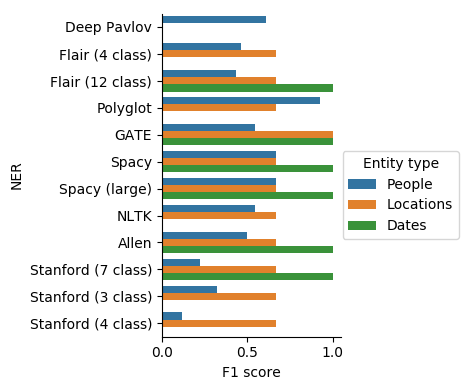

In [64]:
import pandas as pd

df = pd.DataFrame({
    "NER":["Deep Pavlov","Flair (4 class)", "Flair (12 class)", "Polyglot","GATE","Spacy","Spacy (large)","NLTK","Allen","Stanford (7 class)","Stanford (3 class)","Stanford (4 class)"] *3,
    "Entity type":["People"] *12 + ["Locations"] *12 + ["Dates"]*12,
    "F1 score":[
        f1_deeppavlov_ppl, f1_flair4_ppl, f1_flair12_ppl, f1_poly_ppl, f1_gate_ppl, f1_spacy_ppl, f1_spacy_lg_ppl, f1_nltk_ppl, f1_allen_ppl,f1_stanford_ppl3,f1_stanford_ppl1,f1_stanford_ppl2, 
        f1_deeppavlov_loc, f1_flair4_loc, f1_flair12_loc, f1_poly_loc, f1_gate_loc, f1_spacy_loc, f1_spacy_lg_loc, f1_nltk_loc, f1_allen_loc, f1_stanford_loc3,f1_stanford_loc1,f1_stanford_loc2, 
        f1_deeppavlov_dts, f1_flair4_dts, f1_flair12_dts, f1_poly_dts, f1_gate_dts, f1_spacy_dts, f1_spacy_lg_dts, f1_nltk_dts,  f1_allen_dts, f1_stanford_dts3,f1_stanford_dts1,f1_stanford_dts2
    ],
})


import seaborn as sns
sns.factorplot(x='F1 score',y='NER', hue='Entity type', data=df, kind='bar')

plt.show()

# Train your own NER

## Load model from NLP Architect (Intel)

In [0]:
!pip3 install nlp-architect
!git clone https://github.com/NervanaSystems/nlp-architect.git

## Download some Labelled Training Data

In [0]:
!wget "http://files.deeppavlov.ai/deeppavlov_data/conll2003_v2.tar.gz"
!tar xvzf conll2003_v2.tar.gz

## Train model

In [0]:
!python3 nlp-architect/examples/ner/train.py -e 3 --train_file train.txt --test_file test.txt --tag_num 4

## Use trained model

In [0]:
!python3 nlp-architect/examples/ner/interactive.py --model_path model.h5 --model_info_path model_info.dat

## Format results

In [0]:
from nlp_architect.models.ner_crf import NERCRF
model = NERCRF()
model.load("model.h5")

import pickle
with open("model_info.dat", 'rb') as fp:
  model_info = pickle.load(fp)
word_vocab = model_info['word_vocab']
y_vocab = {v: k for k, v in model_info['y_vocab'].items()}
char_vocab = model_info['char_vocab']

from nlp_architect.utils.text import SpacyInstance
nlp = SpacyInstance(disable=['tagger', 'ner', 'parser', 'vectors', 'textcat'])

import numpy as np
from nlp_architect.utils.generic import pad_sentences
def vectorize(doc, w_vocab, c_vocab):
    words = np.asarray([w_vocab[w.lower()] if w.lower() in w_vocab else 1 for w in doc]).reshape(1, -1)
    sentence_chars = []
    for w in doc:
        word_chars = []
        for c in w:
            if c in c_vocab:
                _cid = c_vocab[c]
            else:
                _cid = 1
            word_chars.append(_cid)
        sentence_chars.append(word_chars)
    sentence_chars = np.expand_dims(pad_sentences(sentence_chars, model.word_length), axis=0)
    return words, sentence_chars

def your_ner(text):
  text_arr = nlp.tokenize(text)
  doc_vec = vectorize(text_arr, word_vocab, char_vocab)
  seq_len = np.array([len(text_arr)]).reshape(-1, 1)
  inputs = list(doc_vec)
  if model.crf_mode == 'pad':
    inputs = list(doc_vec) + [seq_len]
  doc_ner = model.predict(inputs, batch_size=1).argmax(2).flatten()
  ners = [y_vocab.get(n, None) for n in doc_ner]
  return convert_entities([(t,n.strip()) for t,n in zip(text_arr, ners)])

In [0]:
your_ner(example_document)

In [0]:
your_ner(test["text"])